# Verifying Parameterized Quantum Circuits

## Variational Quantum Algorithms

Variational quantum algorithms are a family of mixed quantum-classical algorithms that try to achieve a quantum advantage via low-depth circuits. This is achieved by offloading a substantial amount of computational work to a classical processor. The quantum circuits employed by variational quantum algorithms involve *parameterized gates* which depend on some a-priori uninstantiated variable.

Variational quantum algorithms try to optimize the circuit's parameters in each iteration with the classical post-processor while the quantum circuit is used to compute the cost function that is being optimized. Because recompiling the quantum circuit in each of these iterations is a costly procedure, the circuit is usually compiled in *paramterized* form in which the parameters tuned by the classical optimization routine are not bound to specific values.

As is the case with parameter-free circuits, errors can be made during the compilation process. Therefore verifying the correctness of compilations of parameterized quantum circuits is an important task for near-term quantum computing.


## Equivalence Checking of Parameterized Quantum Circuits

Having unbound parameters in a quantum circuits brings new challenges to the task of quantum circuit verification as many data structures have difficulty supporting symbolic computations directly. However, *ZX-diagrams* are an exceptions to this as most rewrite rules used for equivalence checking with the the *ZX-calculus* only involve summation of parameters. 
The ZX-calculus equivalence checker in QCEC cannot be used to prove non-equivalence of quantum circuits. To still show non-equivalence of parameterized quantum circuits QCEC uses a scheme of repeatedly instantiating a circuits parameters in such a way as to make the check as simple as possible while still guaranteeing that either equivalence or non-equivalence can be proven.
The resulting *equivalence checking flow* looks as follows

![Equivalence Checking Flow for Parameterized Quantum Circuits](images/parameterized_flow.svg)

## Using QCEC to Verify Parameterized Quantum Circuits

Consider the following quantum circuit

## Using QCEC to Verify Parameterized Quantum Circuits

Consider the following quantum circuit

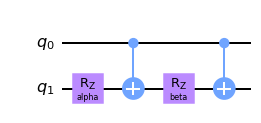

In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter

alpha = Parameter('alpha')
beta = Parameter('beta')

qc_lhs = QuantumCircuit(2)
qc_lhs.rz(alpha, 1)
qc_lhs.cx(0, 1)
qc_lhs.rz(beta, 1)
qc_lhs.cx(0, 1)
qc_lhs.draw(output='mpl')

A well known commutation rule for the $R_Z$ gate, states that this circuit is equivalent to the following one

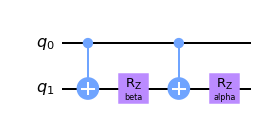

In [2]:
qc_rhs = QuantumCircuit(2)
qc_rhs.cx(0, 1)
qc_rhs.rz(beta, 1)
qc_rhs.cx(0, 1)
qc_rhs.rz(alpha, 1)
qc_rhs.draw(output='mpl')

This equality can be proved with QCEC by using the `verify` method just as with any regular circuit

In [3]:
from mqt import qcec

qcec.verify(qc_lhs, qc_rhs)

{
  "check_time": 8.4089e-05,
  "equivalence": "equivalent",
  "preprocessing_time": 0.000562833
}

QCEC also manages to show non-equivalence of parameterized quantum circuits. 
It is easy to erroneously exchange the parameters in the above commutation rule.

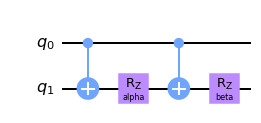

In [4]:
qc_rhs_err = QuantumCircuit(2)
qc_rhs_err.cx(0, 1)
qc_rhs_err.rz(alpha, 1)
qc_rhs_err.cx(0, 1)
qc_rhs_err.rz(beta, 1)
qc_rhs_err.draw(output='mpl')

QCEC will tell us that this is incorrect

In [5]:
qcec.verify(qc_lhs, qc_rhs_err)

{
  "check_time": 0.008827045,
  "equivalence": "not_equivalent",
  "preprocessing_time": 0.000591286,
  "simulations": {
    "performed": 0,
    "started": 4
  }
}

Check out the [reference documentation](library/VerifyCompilation.rst#mqt.qcec.verify_compilation) documentation for more information.